# Titanic: Machine Learning desde el Desastre

El ** RMS Titanic ** fue un transatlántico británico, el mayor barco del mundo al finalizar su construcción, que se hundió en la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1514 personas de las 2223 que iban a bordo, lo que convierte a esta tragedia en uno de los mayores naufragios de la historia ocurridos en tiempo de paz. Construido entre 1909 y 1912 en el astillero Harland and Wolff de Belfast, el Titanic era el segundo de los tres transatlánticos que formaban la clase Olympic, propiedad de la naviera White Star Line, junto al RMS Olympic y, posteriormente, el HMHS Britannic.

### ¿Podría una máquina predecir, en base a los datos obtenidos de los registros históricos, quién sobreviviría a la catástrofe?

<img src="https://www.ecestaticos.com/imagestatic/clipping/faf/a98/fafa98403680b8daf849ebf6810f9df4/como-fueron-los-ultimos-momentos-en-el-titanic-segun-la-carta-de-un-superviviente.jpg?mtime=1475840844" />

## Diccionario de datos

<table>
    <tr>
        <td><strong>Variable</strong></td>
        <td><strong>Definition</strong></td>
        <td><strong>Key</strong></td>
    </tr>
    <tr>
        <td>survival</td>
        <td>Survival</td>
        <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
        <td>pclass</td>
        <td>Ticket class</td>
        <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>Sex</td>
        <td></td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age in years</td>
        <td></td>
    </tr>
    <tr>
        <td>sibsp</td>
        <td># of siblings / spouses aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>parch</td>
        <td># of parents / childers aboard the Tatinic</td>
        <td></td>
    </tr>
    <tr>
        <td>ticket</td>
        <td>Ticket number</td>
        <td></td>
    </tr>
    <tr>
        <td>fare</td>
        <td>Passenger fare</td>
        <td></td>
    </tr>
    <tr>
        <td>cabin</td>
        <td>Cabin number</td>
        <td></td>
    </tr>
    <tr>
        <td>embarked</td>
        <td>Port of Embarkation</td>
        <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
</table>


## Notas sobre las variables
**pclass:** A proxy for socio-economic status (SES)

**1st** = Upper

**2nd** = Middle

**3rd** = Lower


**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
**Sibling** = brother, sister, stepbrother, stepsister
**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch** = The dataset defines family relations in this way...
**Parent** = mother, father
**Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
full = pd.concat([train, test], sort=False)

renamed_columns = {'Age': 'age', 'Cabin': 'cabin', 'Embarked': 'embarked', 
                   'Fare': 'fare', 'Name': 'name', 'Parch': 'parch', 'PassengerId': 'passenger_id', 
                   'Pclass': 'p_class', 'Sex': 'sex', 'SibSp': 'sib_sp', 'Survived': 'survived', 'Ticket': 'ticket'
                  }
train.rename(columns=renamed_columns, inplace=True)
test.rename(columns=renamed_columns, inplace=True)
full.rename(columns=renamed_columns, inplace=True)

# Descripción general de los datos

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
full.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
full.describe()

,passenger_id,survived,p_class,age,sib_sp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
full.isnull().sum()

passenger_id       0
survived         418
p_class            0
name               0
sex                0
age              263
sib_sp             0
parch              0
ticket             0
fare               1
cabin           1014
embarked           2
dtype: int64

# ¿Cuál fue la proporción de sobrevivientes sobre el total?

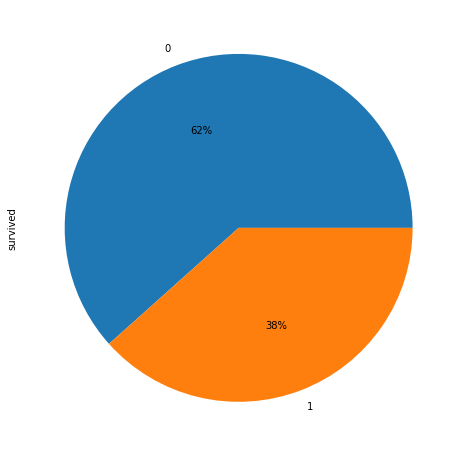

In [9]:
train.survived.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

# ¿Y si disociamos por clase?

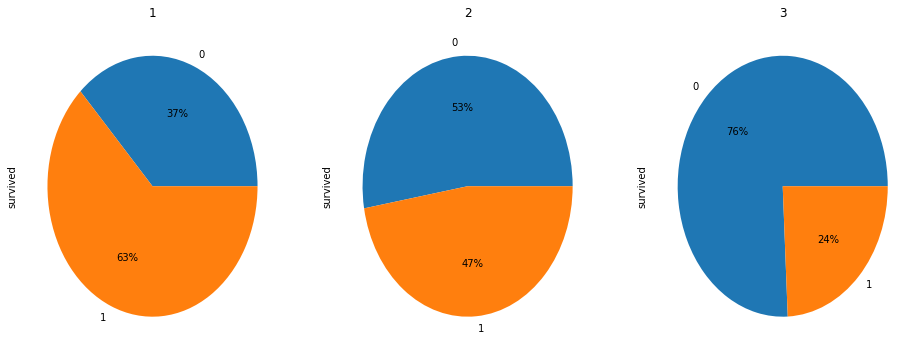

In [252]:
fig, axes = plt.subplots(nrows=1, ncols= train.p_class.nunique(), figsize=(16,6))

for c, i in zip(np.sort(train.p_class.unique()), range(3)):
    train[train.p_class == c].survived.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[i])
    axes[i].set_title(c)

# Mujeres y niños primero! ... mujeres y niños primero ?

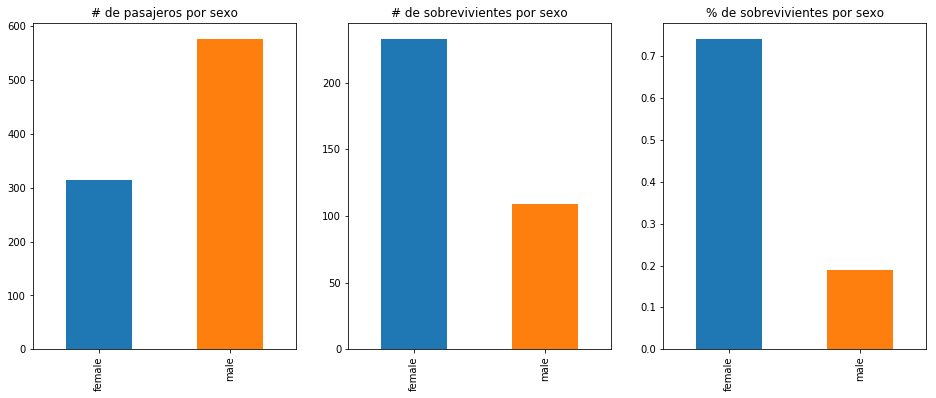

In [253]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de pasajeros por sexo')
train.sex.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes por sexo')
train[train.survived == 1].sex.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por sexo')
(train[train.survived == 1].sex.value_counts().sort_index() / train.sex.value_counts().sort_index()).plot.bar(ax=ax[2])

In [254]:
train['children'] = train.age <= 8

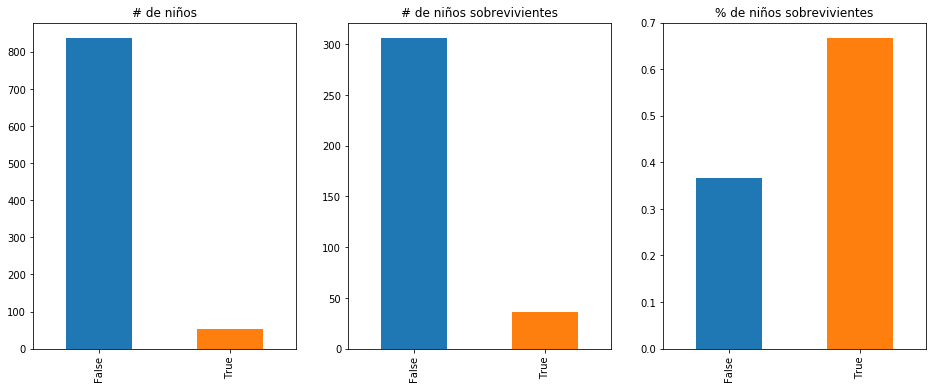

In [255]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de niños')
train.children.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('# de niños sobrevivientes')
train[train.survived == 1].children.value_counts().plot.bar(ax=ax[1])
ax[2].set_title('% de niños sobrevivientes')
(train[train.survived == 1].children.value_counts().sort_index() / train.children.value_counts().sort_index()).plot.bar(ax=ax[2])

# ¿Existe alguna relación entre la clase del pasajero y sus probabilidades de sobrevivir?

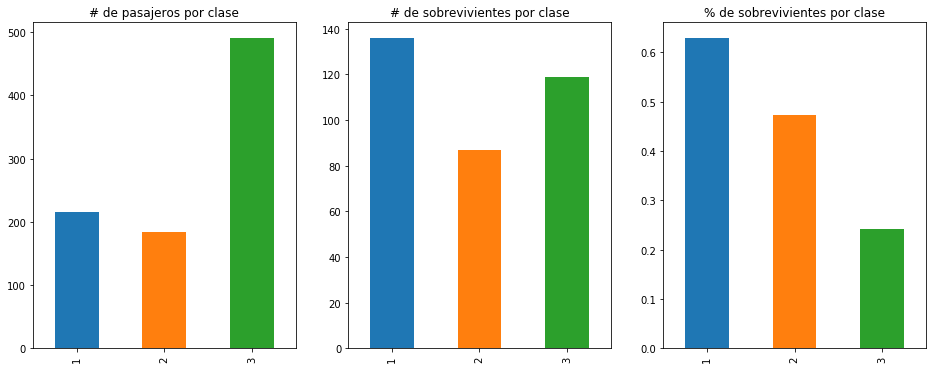

In [256]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de pasajeros por clase')
train.p_class.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes por clase')
train[train.survived == True].p_class.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por clase')
(train[train.survived == True].p_class.value_counts().sort_index() / train.p_class.value_counts().sort_index()).plot.bar(ax=ax[2])

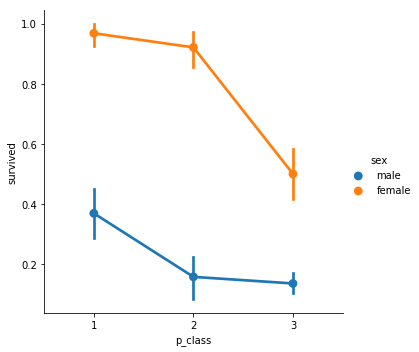

In [14]:
sns.factorplot('p_class','survived',hue='sex',data=train)
plt.show()

# ¿La cabina podría aportar algo de información?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png" />

In [258]:
train['cabin_letter'] = train.cabin.str.strip().str[:1]

In [259]:
print('Porcentaje de valores nulos: {} %'.format(round(sum(train.cabin_letter.isnull()) / train.shape[0] * 100, 2)))

Porcentaje de valores nulos: 77.1 %


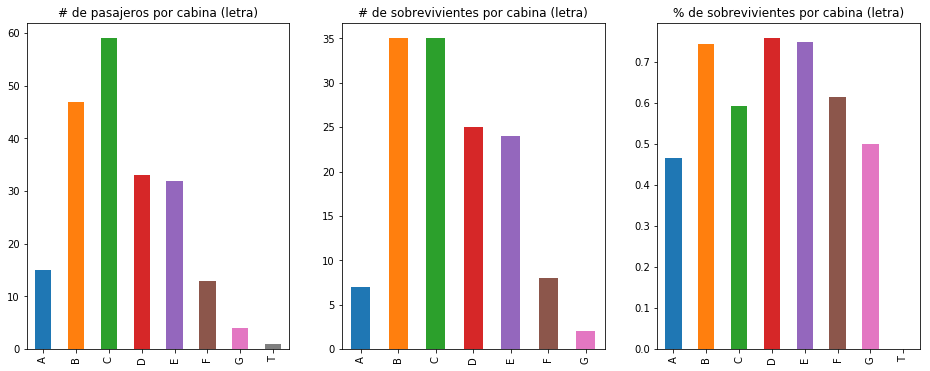

In [260]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de pasajeros por cabina (letra)')
train.cabin_letter.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes por cabina (letra)')
train[train.survived == 1].cabin_letter.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por cabina (letra)')
(train[train.survived == 1].cabin_letter.value_counts().sort_index() / train.cabin_letter.value_counts().sort_index()).plot.bar(ax=ax[2])

# ¿Podría existir una correlación entre el puerto de embarque y la probabilidad de sobrevivir?

C = Cherbourg, Q = Queenstown, S = Southampton

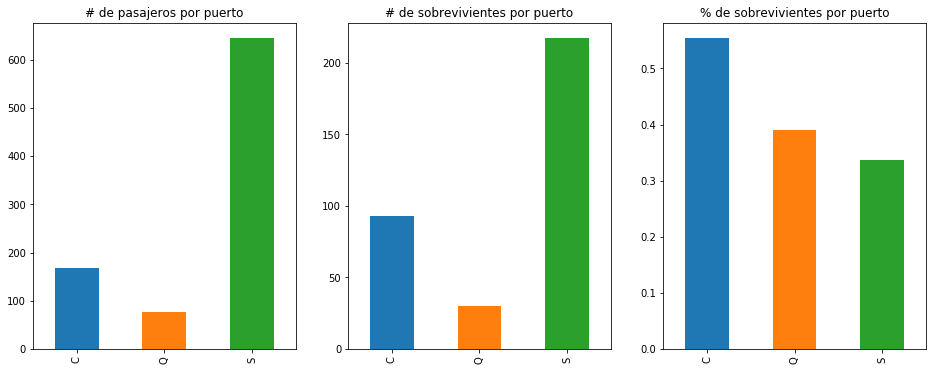

In [261]:
f,ax=plt.subplots(1,3,figsize=(16,6))
plt.xticks(range(3), [train.embarked.unique()])
ax[0].set_title('# de pasajeros por puerto')
train.embarked.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes por puerto')
train[train.survived == True].embarked.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por puerto')
(train[train.survived == True].embarked.value_counts().sort_index() / train.embarked.value_counts().sort_index()).plot.bar(ax=ax[2])

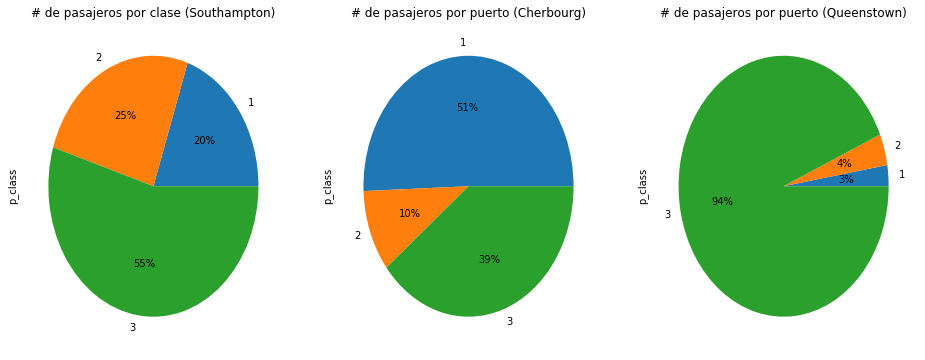

In [262]:
f,ax=plt.subplots(1,3,figsize=(16,6))

ax[0].set_title('# de pasajeros por clase (Southampton)')
train[train.embarked == 'S'].p_class.value_counts().sort_index().plot.pie(ax=ax[0], autopct='%1.0f%%')
ax[1].set_title('# de pasajeros por puerto (Cherbourg)')
train[train.embarked == 'C'].p_class.value_counts().sort_index().plot.pie(ax=ax[1], autopct='%1.0f%%')
ax[2].set_title('# de pasajeros por puerto (Queenstown)')
train[train.embarked == 'Q'].p_class.value_counts().sort_index().plot.pie(ax=ax[2], autopct='%1.0f%%')

# ¿Tener hermanos/as o hermanastros/as a bordo podría inferir en las probabilidades de sobrevivir?

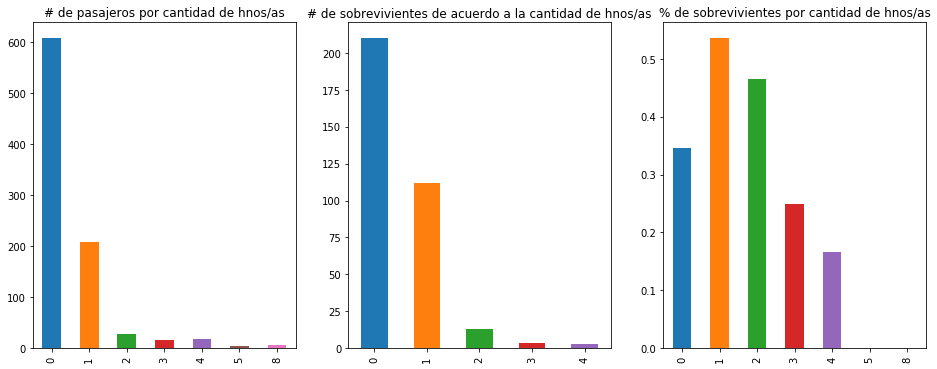

In [263]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de pasajeros por cantidad de hnos/as')
train.sib_sp.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes de acuerdo a la cantidad de hnos/as')
train[train.survived == True].sib_sp.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por cantidad de hnos/as')
(train[train.survived == True].sib_sp.value_counts().sort_index() / train.sib_sp.value_counts().sort_index()).plot.bar(ax=ax[2])

# ¿Tener padres o hijos a bordo podría inferir en las probabilidades de sobrevivir?

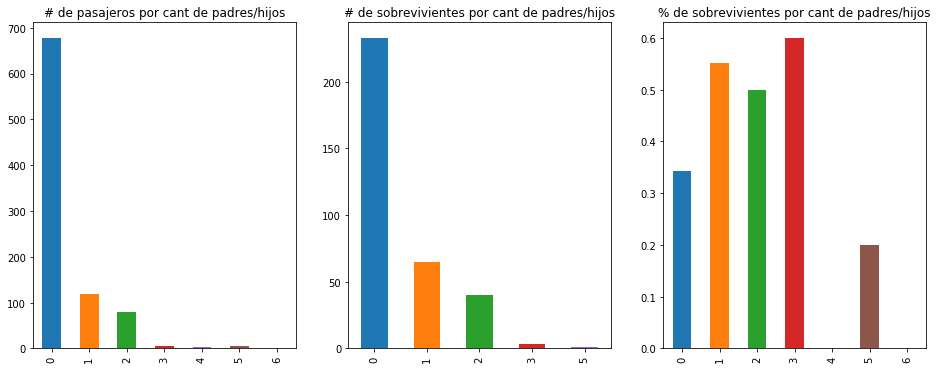

In [264]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de pasajeros por cant de padres/hijos')
train.parch.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes por cant de padres/hijos')
train[train.survived == True].parch.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por cant de padres/hijos')
(train[train.survived == True].parch.value_counts().sort_index() / train.parch.value_counts().sort_index()).plot.bar(ax=ax[2])

### Madres con hijos vs. madres sin hijos

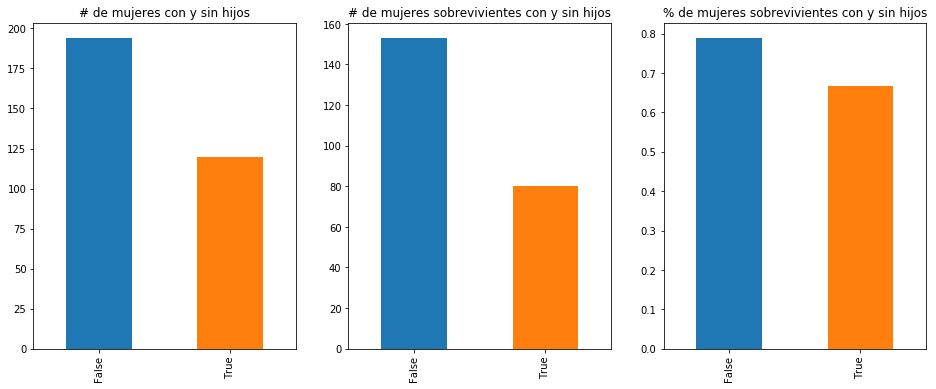

In [265]:
train.loc[train.sex == "female", "has_children"] = train.parch > 0
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de mujeres con y sin hijos')
train[train.sex == 'female'].has_children.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de mujeres sobrevivientes con y sin hijos')
train[(train.sex == 'female') & (train.survived == True)].has_children.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de mujeres sobrevivientes con y sin hijos')
(train[(train.sex == 'female') & (train.survived == True)].has_children.value_counts().sort_index() / train[train.sex == 'female'].has_children.value_counts().sort_index()).plot.bar(ax=ax[2])

# ¿Cuál es la distribución de precios por billete de acuerdo a la clase?

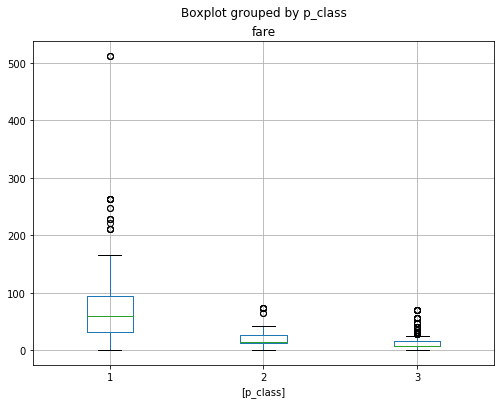

In [266]:
train[train.fare.notnull()][["p_class", "fare"]].boxplot(by='p_class', figsize=(8, 6))

# Correlaciones entre variables

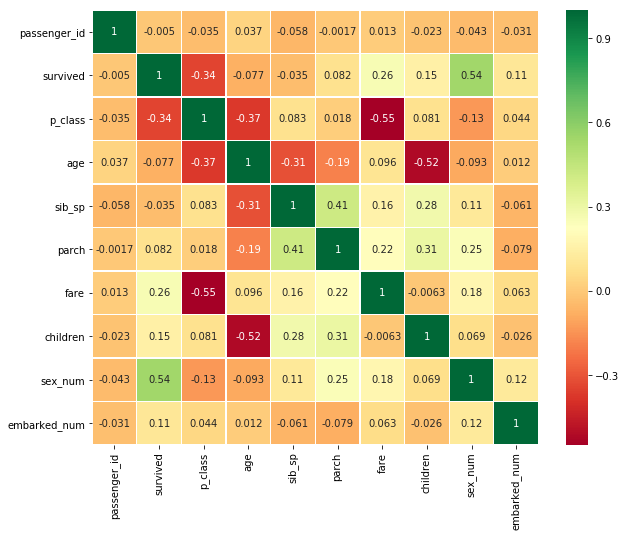

In [267]:
train["sex_num"] = train.sex.replace(['male','female'], [0, 1])
train["embarked_num"] = train.embarked.replace(['S','C','Q'],[0,1,2])
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()